In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
mnist = keras.datasets.fashion_mnist

In [ ]:
((trainX, trainY), (testX, testY)) = mnist.load_data()

In [4]:
import matplotlib.pyplot as plt

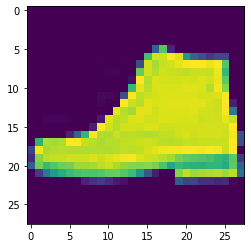

In [5]:
plt.imshow(trainX[42])

In [7]:
trainX[0].shape

(28, 28)

In [8]:
model_DNN = keras.Sequential(
    [keras.layers.Flatten(input_shape = (28, 28)),
     keras.layers.Dense(units = 128, activation='relu'),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(10, activation='softmax')
    ]
)

In [9]:
model_DNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
class MyCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs['loss'] < 0.3:
      print(f'Early stopping on epoch {epoch}')
      self.model.stop_training = True


In [11]:
callbacks = MyCallback()

In [12]:
trainX = trainX / 255.0
testX = testX / 255.0

In [13]:
model_DNN.fit(trainX, trainY, epochs = 10, callbacks= [callbacks])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4851 - accuracy: 0.8272
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3644 - accuracy: 0.8669
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3312 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3067 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2904 - accuracy: 0.8922
Early stopping on epoch 4


In [14]:
model_DNN.evaluate(testX, testY)

313/313 [==============================] - 1s 1ms/step - loss: 0.3567 - accuracy: 0.8704


[0.3567279279232025, 0.8704000115394592]

## **Convolutional Model**

In [15]:
((trainX, trainY), (testX, testY)) = mnist.load_data()

In [16]:
trainX = trainX.reshape(60000, 28, 28, 1)
testX = testX.reshape(10000, 28, 28, 1)
trainX = trainX / 255.0
testX = testX / 255.0

In [17]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [18]:
model_CNN = keras.Sequential([
      Conv2D(64, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
      MaxPooling2D(2, 2),
      Conv2D(64, (3,3), activation = 'relu'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(128, activation = 'relu'),
      Dense(10, activation= 'softmax')
])

In [19]:
model_CNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [21]:
model_CNN.fit(trainX, trainY, epochs = 10, callbacks= [callbacks])


Epoch 1/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.4412 - accuracy: 0.8391
Epoch 2/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.2953 - accuracy: 0.8918
Early stopping on epoch 1


In [22]:
model_CNN.evaluate(testX, testY)

313/313 [==============================] - 4s 14ms/step - loss: 0.3246 - accuracy: 0.8822


[0.3246442973613739, 0.8822000026702881]

# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[:100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

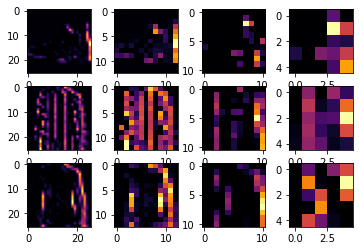

In [23]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model_CNN.layers]
activation_model = tf.keras.models.Model(inputs = model_CNN.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(testX[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(testX[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(testX[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)